In [1]:
import os
from glob import glob
from tqdm import tqdm
import math

# helper libraries
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.ion()   # interactive mode

# pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import transforms, models
from torch.utils.data import DataLoader, Dataset

# sklearn libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
root = os.path.join('../','input','gtsrb-german-traffic-sign')

In [3]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

for i in range(classes) :
    path = os.path.join(root,'train',str(i))+'/'
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

../input/gtsrb-german-traffic-sign/train/0/
../input/gtsrb-german-traffic-sign/train/1/
../input/gtsrb-german-traffic-sign/train/2/
../input/gtsrb-german-traffic-sign/train/3/
../input/gtsrb-german-traffic-sign/train/4/
../input/gtsrb-german-traffic-sign/train/5/
../input/gtsrb-german-traffic-sign/train/6/
../input/gtsrb-german-traffic-sign/train/7/
../input/gtsrb-german-traffic-sign/train/8/
../input/gtsrb-german-traffic-sign/train/9/
../input/gtsrb-german-traffic-sign/train/10/
../input/gtsrb-german-traffic-sign/train/11/
../input/gtsrb-german-traffic-sign/train/12/
../input/gtsrb-german-traffic-sign/train/13/
../input/gtsrb-german-traffic-sign/train/14/
../input/gtsrb-german-traffic-sign/train/15/
../input/gtsrb-german-traffic-sign/train/16/
../input/gtsrb-german-traffic-sign/train/17/
../input/gtsrb-german-traffic-sign/train/18/
../input/gtsrb-german-traffic-sign/train/19/
../input/gtsrb-german-traffic-sign/train/20/
../input/gtsrb-german-traffic-sign/train/21/
../input/gtsrb-germa

In [4]:
os.listdir('../input/gtsrb-german-traffic-sign')

['meta', 'train', 'Meta.csv', 'Train.csv', 'test', 'Test.csv']

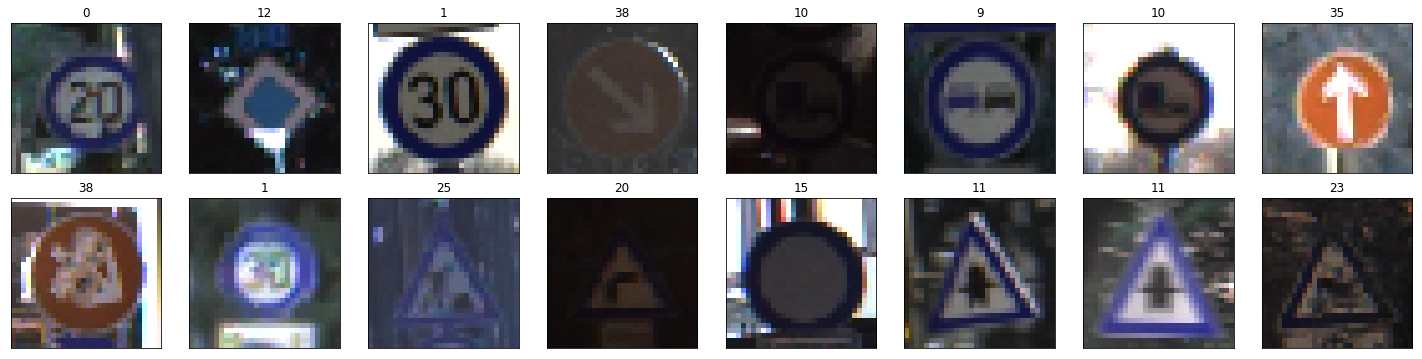

In [5]:
w, h = 8, 8
fig = plt.figure(figsize=(20, 5))
columns, rows = 8, 2
start, end = 0, len(Cells) -1
ax = []
import random
for i in range(columns*rows):
    k = random.randint(start, end)
    img = Cells[k]
    title = labels[k]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(title)  # set title
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
plt.tight_layout(True)
plt.show()  # finally, render the plot

In [6]:
Image.fromarray(Cells[0])
Cells.shape

(39209, 30, 30, 3)

In [7]:
(X_train,X_val,X_test)=Cells[(int)(0.3*len(labels)):],Cells[:(int)(0.2*len(labels))],Cells[(int)(0.2*len(labels)):(int)(0.3*len(labels))]
# X_train = X_train.astype('float32')/255 
# X_val = X_val.astype('float32')/255
# X_test = X_test.astype('float32')/255

(y_train,y_val,y_test)=labels[(int)(0.3*len(labels)):],labels[:(int)(0.2*len(labels))],labels[(int)(0.2*len(labels)):(int)(0.3*len(labels))]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(Cells, labels, test_size=0.2, random_state=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [15]:
print (f"{len(X_train)} : {len(y_train)}")
print (f"{len(X_test)} : {len(y_test)}")
print (f"{len(X_val)} : {len(y_val)}")

25093 : 25093
6274 : 6274
7842 : 7842


In [16]:
# Define a pytorch dataloader for this dataset
class GTSRB(Dataset):
    def __init__(self, Cells, labels, transform=None):
        self.X = Cells
        self.y = labels
        
        self.transform = transform

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        # Load data and get label
        X = self.X[index]
        X = Image.fromarray(X)
        y = torch.tensor(int(self.y[index]))
#         print (np.asarray(X))
        if self.transform:
            X = self.transform(X)

        return X, y

In [ ]:
class CustomNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.Conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3,3), padding=1)
        self.Conv1_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3), padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=64)
        
        self.Conv2_1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3), padding=1)
        self.Conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3,3), padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=128)
        
        self.Conv3_1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3), padding=1)
        self.Conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3,3), padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=256)
        
        self.Conv4_1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3), padding=1)
        self.Conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3,3), padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=512)
        
        self.fc1 = nn.Linear(512*2*2,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,43)
        
        self.pool = nn.MaxPool2d(2,2)
        self.dropout2d = nn.Dropout2d(p=0.5)
        self.dropout1 = nn.Dropout(p=0.4)
        self.dropout2 = nn.Dropout(p=0.5)

        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.Conv1_1(x))
        x = F.relu(self.Conv1_2(x))
        x = self.bn1(x)
        x = self.pool(x)
        x = self.dropout2(x)
        
        x = F.relu(self.Conv2_1(x))
        x = self.bn2(x)
        x = F.relu(self.Conv2_2(x))
        x = self.bn2(x)
        x = self.pool(x)
        x = self.dropout2(x)
        
        x = F.relu(self.Conv3_1(x))
        x = self.bn3(x)
        x = F.relu(self.Conv3_2(x))
        x = self.bn3(x)
        x = self.pool(x)
        x = self.dropout2(x)
        
        x = F.relu(self.Conv4_1(x))
        x = self.bn4(x)
        x = F.relu(self.Conv4_2(x))
        x = self.bn4(x)
        x = self.pool(x)
        x = self.dropout2(x)
        # print(x.shape)
        x = x.view(-1,512*2*2)
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        
        x = self.fc4(x)
        
        output = self.softmax(x)
        
        return output

In [17]:
# norm_mean, norm_std = [0.5073955162068291], [0.2551289894150225]
train_transform = transforms.Compose([
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                     ])
# define the transformation of the val images.
val_transform = transforms.Compose([transforms.ToTensor(),
                                    ])

In [18]:
# Define the training set using the table train_df and using our defined transitions (train_transform)
training_set = GTSRB(X_train, y_train, transform=train_transform)
train_loader = DataLoader(training_set, batch_size=16, shuffle=True, num_workers=4)

In [19]:
# Same for the validation set:
validation_set = GTSRB(X_val, y_val, transform=val_transform)
val_loader = DataLoader(validation_set, batch_size=16, shuffle=False, num_workers=4)

In [20]:
# Test Set
test_set = GTSRB(X_test, y_test, transform=val_transform)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False, num_workers=4)

In [24]:
# next(iter(val_loader))

In [25]:
# feature_extract is a boolean that defines if we are finetuning or feature extracting. 
# If feature_extract = False, the model is finetuned and all model parameters are updated. 
# If feature_extract = True, only the last layer parameters are updated, the others remain fixed.
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [26]:
# model = CustomNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

In [27]:
model_ft = models.densenet169(pretrained=True)
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 43)
model_ft.to(device)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /tmp/.cache/torch/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:03<00:00, 17.8MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [28]:
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [29]:
# we use Adam optimizer, use cross entropy loss as our loss function
optimizer = optim.Adam(model_ft.parameters(), lr=1e-3, betas=(0.9,0.999))
criterion = nn.CrossEntropyLoss().to(device)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

In [30]:
total_loss_train, total_acc_train = [],[]
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()
    train_loss = AverageMeter()
    train_acc = AverageMeter()
    curr_iter = (epoch - 1) * len(train_loader)
    for i, data in enumerate(train_loader):
        images, labels = data
        N = images.size(0)
#         print('image shape:',images.shape, 'label shape',labels.size(0))
        images = Variable(images).to(device)
        labels = Variable(labels).to(device)
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        prediction = outputs.max(1, keepdim=True)[1]
        train_acc.update(prediction.eq(labels.view_as(prediction)).sum().item()/N)
        train_loss.update(loss.item())
        curr_iter += 1
        if (i + 1) % 100 == 0:
            print('[epoch %d], [iter %d / %d], [train loss %.5f], [train acc %.5f]' % (
                epoch, i + 1, len(train_loader), train_loss.avg, train_acc.avg))
            total_loss_train.append(train_loss.avg)
            total_acc_train.append(train_acc.avg)
    return train_loss.avg, train_acc.avg

In [31]:
def validate(val_loader, model, criterion, optimizer, epoch):
    model.eval()
    val_loss = AverageMeter()
    val_acc = AverageMeter()
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            images, labels = data
            N = images.size(0)
            images = Variable(images).to(device)
            labels = Variable(labels).to(device)

            outputs = model(images)
            prediction = outputs.max(1, keepdim=True)[1]

            val_acc.update(prediction.eq(labels.view_as(prediction)).sum().item()/N)

            val_loss.update(criterion(outputs, labels).item())

    print('------------------------------------------------------------')
    print('[epoch %d], [val loss %.5f], [val acc %.5f]' % (epoch, val_loss.avg, val_acc.avg))
    print('------------------------------------------------------------')
    return val_loss.avg, val_acc.avg


In [32]:
import time
since = time.time()
epoch_num = 20
best_val_acc = 0
total_loss_val, total_acc_val = [],[]
for epoch in tqdm((range(1, epoch_num+1))):
    print('\n'*2)
    loss_train, acc_train = train(train_loader, model_ft, criterion, optimizer, epoch)
    loss_val, acc_val = validate(val_loader, model_ft, criterion, optimizer, epoch)
    total_loss_val.append(loss_val)
    total_acc_val.append(acc_val)
    scheduler.step(loss_val)
    if acc_val > best_val_acc:
        best_val_acc = acc_val
        print('\n')
        print('*****************************************************')
        print('best record: [epoch %d], [val loss %.5f], [val acc %.5f]' % (epoch, loss_val, acc_val))
        print('*****************************************************')

print ('Time Taken: ',time.time()-since)

  0%|          | 0/20 [00:00<?, ?it/s]




[epoch 1], [iter 100 / 1569], [train loss 3.22692], [train acc 0.17688]
[epoch 1], [iter 200 / 1569], [train loss 2.85039], [train acc 0.23469]
[epoch 1], [iter 300 / 1569], [train loss 2.61755], [train acc 0.27354]
[epoch 1], [iter 400 / 1569], [train loss 2.40086], [train acc 0.31703]
[epoch 1], [iter 500 / 1569], [train loss 2.21920], [train acc 0.35500]
[epoch 1], [iter 600 / 1569], [train loss 2.09288], [train acc 0.38573]
[epoch 1], [iter 700 / 1569], [train loss 1.97841], [train acc 0.41527]
[epoch 1], [iter 800 / 1569], [train loss 1.88057], [train acc 0.43859]
[epoch 1], [iter 900 / 1569], [train loss 1.78567], [train acc 0.46326]
[epoch 1], [iter 1000 / 1569], [train loss 1.70739], [train acc 0.48319]
[epoch 1], [iter 1100 / 1569], [train loss 1.63189], [train acc 0.50284]
[epoch 1], [iter 1200 / 1569], [train loss 1.56284], [train acc 0.52214]
[epoch 1], [iter 1300 / 1569], [train loss 1.49997], [train acc 0.54038]
[epoch 1], [iter 1400 / 1569], [train loss 1.44681], [tra

  5%|▌         | 1/20 [03:19<1:03:05, 199.23s/it]

------------------------------------------------------------
[epoch 1], [val loss 0.55640], [val acc 0.80066]
------------------------------------------------------------


*****************************************************
best record: [epoch 1], [val loss 0.55640], [val acc 0.80066]
*****************************************************



[epoch 2], [iter 100 / 1569], [train loss 0.62690], [train acc 0.80500]
[epoch 2], [iter 200 / 1569], [train loss 0.64715], [train acc 0.79625]
[epoch 2], [iter 300 / 1569], [train loss 0.62413], [train acc 0.80083]
[epoch 2], [iter 400 / 1569], [train loss 0.60899], [train acc 0.80469]
[epoch 2], [iter 500 / 1569], [train loss 0.59937], [train acc 0.80700]
[epoch 2], [iter 600 / 1569], [train loss 0.58415], [train acc 0.81104]
[epoch 2], [iter 700 / 1569], [train loss 0.56739], [train acc 0.81563]
[epoch 2], [iter 800 / 1569], [train loss 0.55763], [train acc 0.81859]
[epoch 2], [iter 900 / 1569], [train loss 0.54679], [train acc 0.82132]
[epoch

 10%|█         | 2/20 [06:39<59:49, 199.42s/it]  

------------------------------------------------------------
[epoch 2], [val loss 0.32250], [val acc 0.88900]
------------------------------------------------------------


*****************************************************
best record: [epoch 2], [val loss 0.32250], [val acc 0.88900]
*****************************************************



[epoch 3], [iter 100 / 1569], [train loss 0.49786], [train acc 0.85188]
[epoch 3], [iter 200 / 1569], [train loss 0.44360], [train acc 0.86687]
[epoch 3], [iter 300 / 1569], [train loss 0.40901], [train acc 0.87375]
[epoch 3], [iter 400 / 1569], [train loss 0.39146], [train acc 0.87703]
[epoch 3], [iter 500 / 1569], [train loss 0.37443], [train acc 0.88213]
[epoch 3], [iter 600 / 1569], [train loss 0.36608], [train acc 0.88469]
[epoch 3], [iter 700 / 1569], [train loss 0.35596], [train acc 0.88768]
[epoch 3], [iter 800 / 1569], [train loss 0.35434], [train acc 0.88844]
[epoch 3], [iter 900 / 1569], [train loss 0.34453], [train acc 0.89118]
[epoch

 15%|█▌        | 3/20 [09:59<56:35, 199.71s/it]

------------------------------------------------------------
[epoch 3], [val loss 0.31878], [val acc 0.89524]
------------------------------------------------------------


*****************************************************
best record: [epoch 3], [val loss 0.31878], [val acc 0.89524]
*****************************************************



[epoch 4], [iter 100 / 1569], [train loss 0.32094], [train acc 0.90125]
[epoch 4], [iter 200 / 1569], [train loss 0.29064], [train acc 0.90500]
[epoch 4], [iter 300 / 1569], [train loss 0.26677], [train acc 0.91125]
[epoch 4], [iter 400 / 1569], [train loss 0.25557], [train acc 0.91422]
[epoch 4], [iter 500 / 1569], [train loss 0.25439], [train acc 0.91425]
[epoch 4], [iter 600 / 1569], [train loss 0.24648], [train acc 0.91792]
[epoch 4], [iter 700 / 1569], [train loss 0.24559], [train acc 0.91804]
[epoch 4], [iter 800 / 1569], [train loss 0.24155], [train acc 0.92008]
[epoch 4], [iter 900 / 1569], [train loss 0.23746], [train acc 0.92160]
[epoch

 20%|██        | 4/20 [13:18<53:11, 199.46s/it]

------------------------------------------------------------
[epoch 4], [val loss 0.15280], [val acc 0.94959]
------------------------------------------------------------


*****************************************************
best record: [epoch 4], [val loss 0.15280], [val acc 0.94959]
*****************************************************



[epoch 5], [iter 100 / 1569], [train loss 0.20799], [train acc 0.92625]
[epoch 5], [iter 200 / 1569], [train loss 0.20665], [train acc 0.93000]
[epoch 5], [iter 300 / 1569], [train loss 0.24268], [train acc 0.92188]
[epoch 5], [iter 400 / 1569], [train loss 0.24158], [train acc 0.92063]
[epoch 5], [iter 500 / 1569], [train loss 0.23455], [train acc 0.92388]
[epoch 5], [iter 600 / 1569], [train loss 0.22410], [train acc 0.92729]
[epoch 5], [iter 700 / 1569], [train loss 0.21902], [train acc 0.92929]
[epoch 5], [iter 800 / 1569], [train loss 0.21332], [train acc 0.93094]
[epoch 5], [iter 900 / 1569], [train loss 0.20417], [train acc 0.93368]
[epoch

 25%|██▌       | 5/20 [16:36<49:47, 199.16s/it]

------------------------------------------------------------
[epoch 5], [val loss 0.21074], [val acc 0.92897]
------------------------------------------------------------



[epoch 6], [iter 100 / 1569], [train loss 0.21117], [train acc 0.92812]
[epoch 6], [iter 200 / 1569], [train loss 0.18876], [train acc 0.93563]
[epoch 6], [iter 300 / 1569], [train loss 0.18308], [train acc 0.93875]
[epoch 6], [iter 400 / 1569], [train loss 0.17622], [train acc 0.94063]
[epoch 6], [iter 500 / 1569], [train loss 0.17525], [train acc 0.94125]
[epoch 6], [iter 600 / 1569], [train loss 0.16904], [train acc 0.94344]
[epoch 6], [iter 700 / 1569], [train loss 0.16024], [train acc 0.94616]
[epoch 6], [iter 800 / 1569], [train loss 0.15947], [train acc 0.94734]
[epoch 6], [iter 900 / 1569], [train loss 0.16098], [train acc 0.94729]
[epoch 6], [iter 1000 / 1569], [train loss 0.16672], [train acc 0.94588]
[epoch 6], [iter 1100 / 1569], [train loss 0.16958], [train acc 0.94557]
[epoch 6], [iter 1200 / 1569], [

 30%|███       | 6/20 [19:54<46:23, 198.80s/it]

------------------------------------------------------------
[epoch 6], [val loss 0.11973], [val acc 0.96181]
------------------------------------------------------------


*****************************************************
best record: [epoch 6], [val loss 0.11973], [val acc 0.96181]
*****************************************************



[epoch 7], [iter 100 / 1569], [train loss 0.17824], [train acc 0.94375]
[epoch 7], [iter 200 / 1569], [train loss 0.15524], [train acc 0.94844]
[epoch 7], [iter 300 / 1569], [train loss 0.15067], [train acc 0.95042]
[epoch 7], [iter 400 / 1569], [train loss 0.15757], [train acc 0.94937]
[epoch 7], [iter 500 / 1569], [train loss 0.16000], [train acc 0.94875]
[epoch 7], [iter 600 / 1569], [train loss 0.15529], [train acc 0.95063]
[epoch 7], [iter 700 / 1569], [train loss 0.15147], [train acc 0.95223]
[epoch 7], [iter 800 / 1569], [train loss 0.14979], [train acc 0.95312]
[epoch 7], [iter 900 / 1569], [train loss 0.15149], [train acc 0.95271]
[epoch

 35%|███▌      | 7/20 [23:13<43:03, 198.76s/it]

------------------------------------------------------------
[epoch 7], [val loss 0.14779], [val acc 0.95570]
------------------------------------------------------------



[epoch 8], [iter 100 / 1569], [train loss 0.13143], [train acc 0.95750]
[epoch 8], [iter 200 / 1569], [train loss 0.15482], [train acc 0.95031]
[epoch 8], [iter 300 / 1569], [train loss 0.14529], [train acc 0.95312]
[epoch 8], [iter 400 / 1569], [train loss 0.13099], [train acc 0.95641]
[epoch 8], [iter 500 / 1569], [train loss 0.12835], [train acc 0.95700]
[epoch 8], [iter 600 / 1569], [train loss 0.13020], [train acc 0.95719]
[epoch 8], [iter 700 / 1569], [train loss 0.13140], [train acc 0.95688]
[epoch 8], [iter 800 / 1569], [train loss 0.14403], [train acc 0.95383]
[epoch 8], [iter 900 / 1569], [train loss 0.14180], [train acc 0.95431]
[epoch 8], [iter 1000 / 1569], [train loss 0.13998], [train acc 0.95513]
[epoch 8], [iter 1100 / 1569], [train loss 0.13612], [train acc 0.95653]
[epoch 8], [iter 1200 / 1569], [

 40%|████      | 8/20 [26:32<39:44, 198.74s/it]

------------------------------------------------------------
[epoch 8], [val loss 0.09593], [val acc 0.96818]
------------------------------------------------------------


*****************************************************
best record: [epoch 8], [val loss 0.09593], [val acc 0.96818]
*****************************************************



[epoch 9], [iter 100 / 1569], [train loss 0.10329], [train acc 0.96688]
[epoch 9], [iter 200 / 1569], [train loss 0.10175], [train acc 0.96531]
[epoch 9], [iter 300 / 1569], [train loss 0.09153], [train acc 0.96854]
[epoch 9], [iter 400 / 1569], [train loss 0.08671], [train acc 0.97094]
[epoch 9], [iter 500 / 1569], [train loss 0.09234], [train acc 0.97013]
[epoch 9], [iter 600 / 1569], [train loss 0.11327], [train acc 0.96615]
[epoch 9], [iter 700 / 1569], [train loss 0.11514], [train acc 0.96455]
[epoch 9], [iter 800 / 1569], [train loss 0.12182], [train acc 0.96281]
[epoch 9], [iter 900 / 1569], [train loss 0.13036], [train acc 0.96021]
[epoch

 45%|████▌     | 9/20 [29:49<36:21, 198.31s/it]

------------------------------------------------------------
[epoch 9], [val loss 0.07584], [val acc 0.97505]
------------------------------------------------------------


*****************************************************
best record: [epoch 9], [val loss 0.07584], [val acc 0.97505]
*****************************************************



[epoch 10], [iter 100 / 1569], [train loss 0.11884], [train acc 0.96188]
[epoch 10], [iter 200 / 1569], [train loss 0.10546], [train acc 0.96531]
[epoch 10], [iter 300 / 1569], [train loss 0.09850], [train acc 0.96792]
[epoch 10], [iter 400 / 1569], [train loss 0.09102], [train acc 0.96984]
[epoch 10], [iter 500 / 1569], [train loss 0.08428], [train acc 0.97213]
[epoch 10], [iter 600 / 1569], [train loss 0.08979], [train acc 0.97135]
[epoch 10], [iter 700 / 1569], [train loss 0.09160], [train acc 0.97062]
[epoch 10], [iter 800 / 1569], [train loss 0.09310], [train acc 0.97039]
[epoch 10], [iter 900 / 1569], [train loss 0.09345], [train acc 0.9705

 50%|█████     | 10/20 [33:07<33:03, 198.34s/it]

------------------------------------------------------------
[epoch 10], [val loss 0.10417], [val acc 0.96461]
------------------------------------------------------------



[epoch 11], [iter 100 / 1569], [train loss 0.13008], [train acc 0.96688]
[epoch 11], [iter 200 / 1569], [train loss 0.12666], [train acc 0.96437]
[epoch 11], [iter 300 / 1569], [train loss 0.11075], [train acc 0.96688]
[epoch 11], [iter 400 / 1569], [train loss 0.10371], [train acc 0.96813]
[epoch 11], [iter 500 / 1569], [train loss 0.09793], [train acc 0.96962]
[epoch 11], [iter 600 / 1569], [train loss 0.09685], [train acc 0.96979]
[epoch 11], [iter 700 / 1569], [train loss 0.09338], [train acc 0.97080]
[epoch 11], [iter 800 / 1569], [train loss 0.09582], [train acc 0.96922]
[epoch 11], [iter 900 / 1569], [train loss 0.09609], [train acc 0.96910]
[epoch 11], [iter 1000 / 1569], [train loss 0.09339], [train acc 0.96969]
[epoch 11], [iter 1100 / 1569], [train loss 0.09332], [train acc 0.96966]
[epoch 11], [iter 12

 55%|█████▌    | 11/20 [36:26<29:44, 198.33s/it]

------------------------------------------------------------
[epoch 11], [val loss 0.08307], [val acc 0.97225]
------------------------------------------------------------



[epoch 12], [iter 100 / 1569], [train loss 0.05622], [train acc 0.98000]
[epoch 12], [iter 200 / 1569], [train loss 0.06398], [train acc 0.97937]
[epoch 12], [iter 300 / 1569], [train loss 0.07436], [train acc 0.97688]
[epoch 12], [iter 400 / 1569], [train loss 0.06926], [train acc 0.97875]
[epoch 12], [iter 500 / 1569], [train loss 0.07036], [train acc 0.97862]
[epoch 12], [iter 600 / 1569], [train loss 0.07291], [train acc 0.97813]
[epoch 12], [iter 700 / 1569], [train loss 0.07464], [train acc 0.97804]
[epoch 12], [iter 800 / 1569], [train loss 0.07549], [train acc 0.97727]
[epoch 12], [iter 900 / 1569], [train loss 0.07473], [train acc 0.97757]
[epoch 12], [iter 1000 / 1569], [train loss 0.07250], [train acc 0.97813]
[epoch 12], [iter 1100 / 1569], [train loss 0.07548], [train acc 0.97727]
[epoch 12], [iter 12

 60%|██████    | 12/20 [39:44<26:26, 198.26s/it]

------------------------------------------------------------
[epoch 12], [val loss 0.09662], [val acc 0.97009]
------------------------------------------------------------



[epoch 13], [iter 100 / 1569], [train loss 0.07367], [train acc 0.98062]
[epoch 13], [iter 200 / 1569], [train loss 0.06572], [train acc 0.98313]
[epoch 13], [iter 300 / 1569], [train loss 0.07882], [train acc 0.97979]
[epoch 13], [iter 400 / 1569], [train loss 0.11587], [train acc 0.97266]
[epoch 13], [iter 500 / 1569], [train loss 0.12230], [train acc 0.96988]
[epoch 13], [iter 600 / 1569], [train loss 0.12119], [train acc 0.96885]
[epoch 13], [iter 700 / 1569], [train loss 0.11599], [train acc 0.96929]
[epoch 13], [iter 800 / 1569], [train loss 0.11295], [train acc 0.96984]
[epoch 13], [iter 900 / 1569], [train loss 0.10940], [train acc 0.97028]
[epoch 13], [iter 1000 / 1569], [train loss 0.10556], [train acc 0.97069]
[epoch 13], [iter 1100 / 1569], [train loss 0.10489], [train acc 0.97062]
[epoch 13], [iter 12

 65%|██████▌   | 13/20 [43:07<23:19, 199.87s/it]

------------------------------------------------------------
[epoch 13], [val loss 0.07627], [val acc 0.97531]
------------------------------------------------------------


*****************************************************
best record: [epoch 13], [val loss 0.07627], [val acc 0.97531]
*****************************************************



[epoch 14], [iter 100 / 1569], [train loss 0.09220], [train acc 0.97375]
[epoch 14], [iter 200 / 1569], [train loss 0.07779], [train acc 0.97719]
[epoch 14], [iter 300 / 1569], [train loss 0.08907], [train acc 0.97333]
[epoch 14], [iter 400 / 1569], [train loss 0.08208], [train acc 0.97531]
[epoch 14], [iter 500 / 1569], [train loss 0.07927], [train acc 0.97600]
[epoch 14], [iter 600 / 1569], [train loss 0.07401], [train acc 0.97740]
[epoch 14], [iter 700 / 1569], [train loss 0.07120], [train acc 0.97813]
[epoch 14], [iter 800 / 1569], [train loss 0.07081], [train acc 0.97844]
[epoch 14], [iter 900 / 1569], [train loss 0.07069], [train acc 0.97

 70%|███████   | 14/20 [46:26<19:56, 199.42s/it]

------------------------------------------------------------
[epoch 14], [val loss 0.09845], [val acc 0.96716]
------------------------------------------------------------



[epoch 15], [iter 100 / 1569], [train loss 0.06886], [train acc 0.97875]
[epoch 15], [iter 200 / 1569], [train loss 0.05555], [train acc 0.98250]
[epoch 15], [iter 300 / 1569], [train loss 0.05315], [train acc 0.98375]
[epoch 15], [iter 400 / 1569], [train loss 0.05855], [train acc 0.98188]
[epoch 15], [iter 500 / 1569], [train loss 0.05957], [train acc 0.98113]
[epoch 15], [iter 600 / 1569], [train loss 0.06058], [train acc 0.98083]
[epoch 15], [iter 700 / 1569], [train loss 0.05879], [train acc 0.98071]
[epoch 15], [iter 800 / 1569], [train loss 0.05953], [train acc 0.98023]
[epoch 15], [iter 900 / 1569], [train loss 0.06054], [train acc 0.98021]
[epoch 15], [iter 1000 / 1569], [train loss 0.06172], [train acc 0.98013]
[epoch 15], [iter 1100 / 1569], [train loss 0.06546], [train acc 0.97915]
[epoch 15], [iter 12

 75%|███████▌  | 15/20 [49:44<16:34, 198.93s/it]

------------------------------------------------------------
[epoch 15], [val loss 0.09679], [val acc 0.97021]
------------------------------------------------------------



[epoch 16], [iter 100 / 1569], [train loss 0.05169], [train acc 0.98313]
[epoch 16], [iter 200 / 1569], [train loss 0.05274], [train acc 0.98344]
[epoch 16], [iter 300 / 1569], [train loss 0.05899], [train acc 0.98167]
[epoch 16], [iter 400 / 1569], [train loss 0.05940], [train acc 0.98125]
[epoch 16], [iter 500 / 1569], [train loss 0.06174], [train acc 0.98050]
[epoch 16], [iter 600 / 1569], [train loss 0.06244], [train acc 0.98031]
[epoch 16], [iter 700 / 1569], [train loss 0.05945], [train acc 0.98134]
[epoch 16], [iter 800 / 1569], [train loss 0.05894], [train acc 0.98125]
[epoch 16], [iter 900 / 1569], [train loss 0.05779], [train acc 0.98146]
[epoch 16], [iter 1000 / 1569], [train loss 0.06248], [train acc 0.98069]
[epoch 16], [iter 1100 / 1569], [train loss 0.06493], [train acc 0.97955]
[epoch 16], [iter 12

 80%|████████  | 16/20 [53:02<13:15, 198.79s/it]

------------------------------------------------------------
[epoch 16], [val loss 0.08602], [val acc 0.97365]
------------------------------------------------------------



[epoch 17], [iter 100 / 1569], [train loss 0.06263], [train acc 0.98000]
[epoch 17], [iter 200 / 1569], [train loss 0.07509], [train acc 0.97594]
[epoch 17], [iter 300 / 1569], [train loss 0.07929], [train acc 0.97479]
[epoch 17], [iter 400 / 1569], [train loss 0.07399], [train acc 0.97578]
[epoch 17], [iter 500 / 1569], [train loss 0.06810], [train acc 0.97750]
[epoch 17], [iter 600 / 1569], [train loss 0.06579], [train acc 0.97792]
[epoch 17], [iter 700 / 1569], [train loss 0.06198], [train acc 0.97955]
[epoch 17], [iter 800 / 1569], [train loss 0.06132], [train acc 0.97961]
[epoch 17], [iter 900 / 1569], [train loss 0.05996], [train acc 0.98021]
[epoch 17], [iter 1000 / 1569], [train loss 0.05935], [train acc 0.98062]
[epoch 17], [iter 1100 / 1569], [train loss 0.05934], [train acc 0.98068]
[epoch 17], [iter 12

 85%|████████▌ | 17/20 [56:20<09:55, 198.64s/it]

------------------------------------------------------------
[epoch 17], [val loss 0.08513], [val acc 0.97658]
------------------------------------------------------------


*****************************************************
best record: [epoch 17], [val loss 0.08513], [val acc 0.97658]
*****************************************************



[epoch 18], [iter 100 / 1569], [train loss 0.05170], [train acc 0.98313]
[epoch 18], [iter 200 / 1569], [train loss 0.03954], [train acc 0.98719]
[epoch 18], [iter 300 / 1569], [train loss 0.04675], [train acc 0.98479]
[epoch 18], [iter 400 / 1569], [train loss 0.05314], [train acc 0.98359]
[epoch 18], [iter 500 / 1569], [train loss 0.06441], [train acc 0.98000]
[epoch 18], [iter 600 / 1569], [train loss 0.07027], [train acc 0.97792]
[epoch 18], [iter 700 / 1569], [train loss 0.06730], [train acc 0.97866]
[epoch 18], [iter 800 / 1569], [train loss 0.06588], [train acc 0.97930]
[epoch 18], [iter 900 / 1569], [train loss 0.06341], [train acc 0.97

 90%|█████████ | 18/20 [59:40<06:37, 198.86s/it]

------------------------------------------------------------
[epoch 18], [val loss 0.04814], [val acc 0.98282]
------------------------------------------------------------


*****************************************************
best record: [epoch 18], [val loss 0.04814], [val acc 0.98282]
*****************************************************



[epoch 19], [iter 100 / 1569], [train loss 0.04225], [train acc 0.98625]
[epoch 19], [iter 200 / 1569], [train loss 0.05316], [train acc 0.98344]
[epoch 19], [iter 300 / 1569], [train loss 0.04633], [train acc 0.98562]
[epoch 19], [iter 400 / 1569], [train loss 0.05148], [train acc 0.98438]
[epoch 19], [iter 500 / 1569], [train loss 0.05376], [train acc 0.98325]
[epoch 19], [iter 600 / 1569], [train loss 0.05005], [train acc 0.98458]
[epoch 19], [iter 700 / 1569], [train loss 0.05121], [train acc 0.98393]
[epoch 19], [iter 800 / 1569], [train loss 0.05182], [train acc 0.98391]
[epoch 19], [iter 900 / 1569], [train loss 0.05196], [train acc 0.98

 95%|█████████▌| 19/20 [1:02:58<03:18, 198.76s/it]

------------------------------------------------------------
[epoch 19], [val loss 0.19642], [val acc 0.97085]
------------------------------------------------------------



[epoch 20], [iter 100 / 1569], [train loss 0.04382], [train acc 0.98687]
[epoch 20], [iter 200 / 1569], [train loss 0.05084], [train acc 0.98594]
[epoch 20], [iter 300 / 1569], [train loss 0.06057], [train acc 0.98146]
[epoch 20], [iter 400 / 1569], [train loss 0.05607], [train acc 0.98250]
[epoch 20], [iter 500 / 1569], [train loss 0.05405], [train acc 0.98300]
[epoch 20], [iter 600 / 1569], [train loss 0.05329], [train acc 0.98323]
[epoch 20], [iter 700 / 1569], [train loss 0.05015], [train acc 0.98420]
[epoch 20], [iter 800 / 1569], [train loss 0.05318], [train acc 0.98367]
[epoch 20], [iter 900 / 1569], [train loss 0.05158], [train acc 0.98389]
[epoch 20], [iter 1000 / 1569], [train loss 0.05025], [train acc 0.98419]
[epoch 20], [iter 1100 / 1569], [train loss 0.04954], [train acc 0.98415]
[epoch 20], [iter 12

100%|██████████| 20/20 [1:06:15<00:00, 198.79s/it]

------------------------------------------------------------
[epoch 20], [val loss 0.07377], [val acc 0.97772]
------------------------------------------------------------
Time Taken:  3975.7506392002106


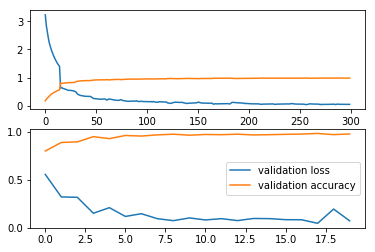

In [33]:
fig = plt.figure(num = 2)
fig1 = fig.add_subplot(2,1,1)
fig2 = fig.add_subplot(2,1,2)
fig1.plot(total_loss_train, label = 'training loss')
fig1.plot(total_acc_train, label = 'training accuracy')
fig2.plot(total_loss_val, label = 'validation loss')
fig2.plot(total_acc_val, label = 'validation accuracy')
plt.legend()
plt.show()

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
print (len(y_test))

In [36]:
model_ft.eval()
y_label = []
y_predict = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        images, labels = data
        N = images.size(0)
        images = Variable(images).to(device)
        outputs = model_ft(images)
        prediction = outputs.max(1, keepdim=True)[1]
        y_label.extend(labels.cpu().numpy())
        y_predict.extend(np.squeeze(prediction.cpu().numpy().T))
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_label, y_predict)

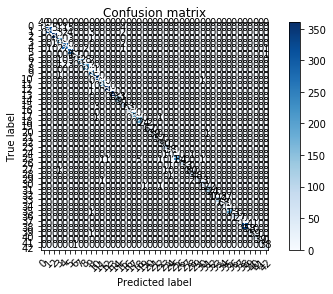

In [37]:
plot_labels = [str(i) for i in range(43)]
plot_confusion_matrix(confusion_mtx, plot_labels)

In [38]:
# Generate a classification report
report = classification_report(y_label, y_predict, target_names=plot_labels)
print(report)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        40
           1       0.99      0.94      0.97       340
           2       0.98      0.96      0.97       372
           3       0.95      0.98      0.97       215
           4       0.98      0.99      0.98       288
           5       0.93      0.97      0.95       290
           6       0.98      0.98      0.98        62
           7       1.00      0.85      0.92       247
           8       0.88      0.96      0.92       225
           9       0.95      1.00      0.97       246
          10       0.98      1.00      0.99       323
          11       0.99      0.99      0.99       195
          12       1.00      1.00      1.00       359
          13       1.00      1.00      1.00       361
          14       1.00      0.99      1.00       134
          15       0.90      1.00      0.95        91
          16       1.00      0.95      0.98        66
          17       1.00    

In [40]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
# print(label_frac_error)
# plt.bar(np.arange(7),height=label_frac_error)
# plt.xlabel('True Label')
# plt.ylabel('Fraction classified incorrectly')

<Figure size 1080x504 with 0 Axes>

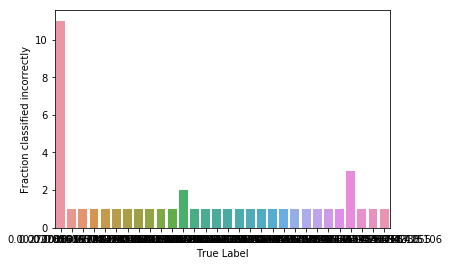

<Figure size 1080x504 with 0 Axes>

In [41]:
import seaborn as sns
sns.countplot(x=label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')
plt.figure(figsize=(15,7))